<a href="https://colab.research.google.com/github/MukeshMishraReloaded/projects/blob/main/Delhivery_business_case.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DELHIVERY

Delhivery is the largest and fastest-growing fully integrated player in India by revenue in Fiscal 2021. They aim to build the operating system for commerce, through a combination of world-class infrastructure, logistics operations of the highest quality, and cutting-edge engineering and technology capabilities.

The Data team builds intelligence and capabilities using this data that helps them to widen the gap between the quality, efficiency, and profitability of their business versus their competitors.

#Column Profiling:

data - tells whether the data is testing or training data

trip_creation_time – Timestamp of trip creation

route_schedule_uuid – Unique Id for a particular route schedule

route_type – Transportation type

FTL – Full Truck Load: FTL shipments get to the destination sooner, as the truck is making no other pickups or drop-offs along the way

Carting: Handling system consisting of small vehicles (carts)

trip_uuid - Unique ID given to a particular trip (A trip may include different source and destination centers)

source_center - Source ID of trip origin

source_name - Source Name of trip origin

destination_cente – Destination ID

destination_name – Destination Name

od_start_time – Trip start time

od_end_time – Trip end time

start_scan_to_end_scan – Time taken to deliver from source to destination

is_cutoff – Unknown field

cutoff_factor – Unknown field

cutoff_timestamp – Unknown field

actual_distance_to_destination – Distance in Kms between source and destination warehouse

actual_time – Actual time taken to complete the delivery (Cumulative)

osrm_time – An open-source routing engine time calculator which computes
the shortest path between points in a given map (Includes usual traffic, distance through major and minor roads) and gives the time (Cumulative)

osrm_distance – An open-source routing engine which computes the shortest path between points in a given map (Includes usual traffic, distance through major and minor roads) (Cumulative)

factor – Unknown field

segment_actual_time – This is a segment time. Time taken by the subset of the package delivery

segment_osrm_time – This is the OSRM segment time. Time taken by the subset of the package delivery

segment_osrm_distance – This is the OSRM distance. Distance covered by subset of the package delivery

segment_factor – Unknown field

#Concept Used:

Feature Creation

Relationship between Features

Column Normalization /Column Standardization

Handling categorical values

Missing values - Outlier treatment / Types of outliers

---

https://colab.research.google.com/drive/1tpDQjaP7KQtxB42FAL2Ju5o2iPhwmQ9T#scrollTo=yy6MZ4xIaUz9&uniqifier=2

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import

In [ ]:
df=pd.read_csv('https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/551/original/delhivery_data.csv?1642751181')

In [ ]:
df.head(5)

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


In [ ]:
df['source_name'].isnull().sum()

293

In [ ]:
df['destination_name'].isnull().sum()

261

In [ ]:
df[df['destination_name'].isnull()]['destination_center'].unique()

array(['IND342902A1B', 'IND577116AAA', 'IND282002AAD', 'IND465333A1B',
       'IND841301AAC', 'IND505326AAB', 'IND852118A1B', 'IND126116AAA',
       'IND509103AAC', 'IND221005A1A', 'IND250002AAC', 'IND331001A1C',
       'IND122015AAC'], dtype=object)

In [ ]:
df.shape

(144867, 24)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  is_cutoff       

In [ ]:
df.isnull().sum()

data                                0
trip_creation_time                  0
route_schedule_uuid                 0
route_type                          0
trip_uuid                           0
source_center                       0
source_name                       293
destination_center                  0
destination_name                  261
od_start_time                       0
od_end_time                         0
start_scan_to_end_scan              0
is_cutoff                           0
cutoff_factor                       0
cutoff_timestamp                    0
actual_distance_to_destination      0
actual_time                         0
osrm_time                           0
osrm_distance                       0
factor                              0
segment_actual_time                 0
segment_osrm_time                   0
segment_osrm_distance               0
segment_factor                      0
dtype: int64

In [ ]:
#percentage of null values in source_name column
source_name_isNULL_pcnt = 100*df['source_name'].isnull().sum()/df.shape[0]
np.round(source_name_isNULL_pcnt, 3)

0.202

In [ ]:
#percentage of null values in destination_name column
destination_name_isNULL_pcnt = 100*df['destination_name'].isnull().sum()/df.shape[0]
np.round(destination_name_isNULL_pcnt, 3)

0.18

In [ ]:
#Drop rows with 'na' values, as the percentage of null values is quite low.
df.dropna(inplace=True)

In [ ]:
cat_cols = ['is_cutoff', 'route_type', 'data']
num_cols = df.dtypes =='float64'
num_cols = list(num_cols[num_cols].index)
num_cols.remove('factor')
num_cols.remove('segment_actual_time')
num_cols.remove('segment_osrm_time')
num_cols.remove('segment_osrm_distance')
num_cols.remove('segment_factor')
num_cols.remove('start_scan_to_end_scan')
print(cat_cols)
print(num_cols)

['is_cutoff', 'route_type', 'data']
['actual_distance_to_destination', 'actual_time', 'osrm_time', 'osrm_distance']


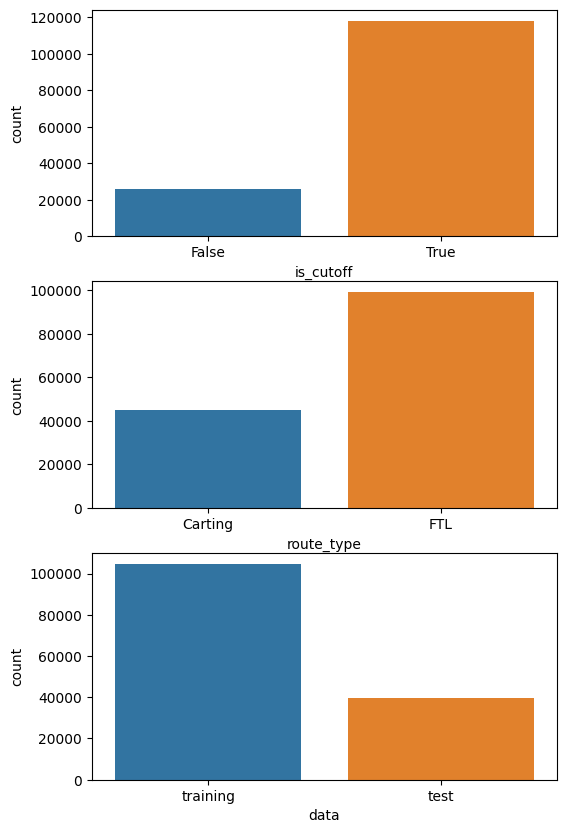

In [ ]:
# countplot for each categorical column

fig, axis = plt.subplots(nrows=3, ncols=1, figsize=(6, 10))
idx = 0
for row in range(3):
    for col in range(1):
        sns.countplot(data=df, x=cat_cols[idx], ax=axis[row])
        idx += 1
plt.show()


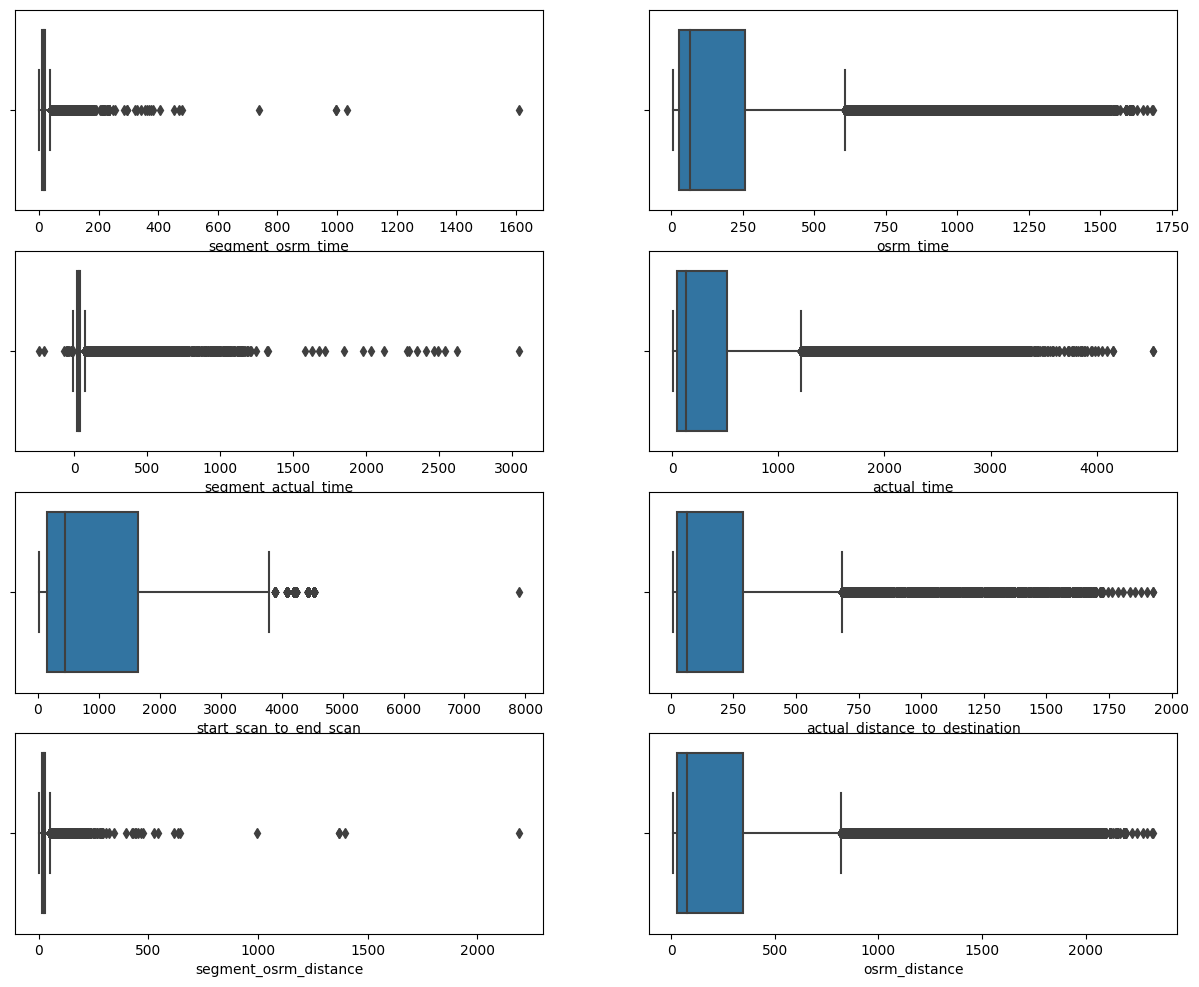

In [ ]:
#Intial Outlier analysis
num_cols = ['segment_osrm_time', 'osrm_time',
            'segment_actual_time', 'actual_time',
            'start_scan_to_end_scan', 'actual_distance_to_destination',
            'segment_osrm_distance', 'osrm_distance']
#Box plot for each numerical column
fig, axis = plt.subplots(nrows=4, ncols=2, figsize=(15, 12))
idx = 0
for row in range(4):
  for col in range(2):
    sns.boxplot(data=df, x=num_cols[idx], ax=axis[row, col])
    idx += 1
plt.show()

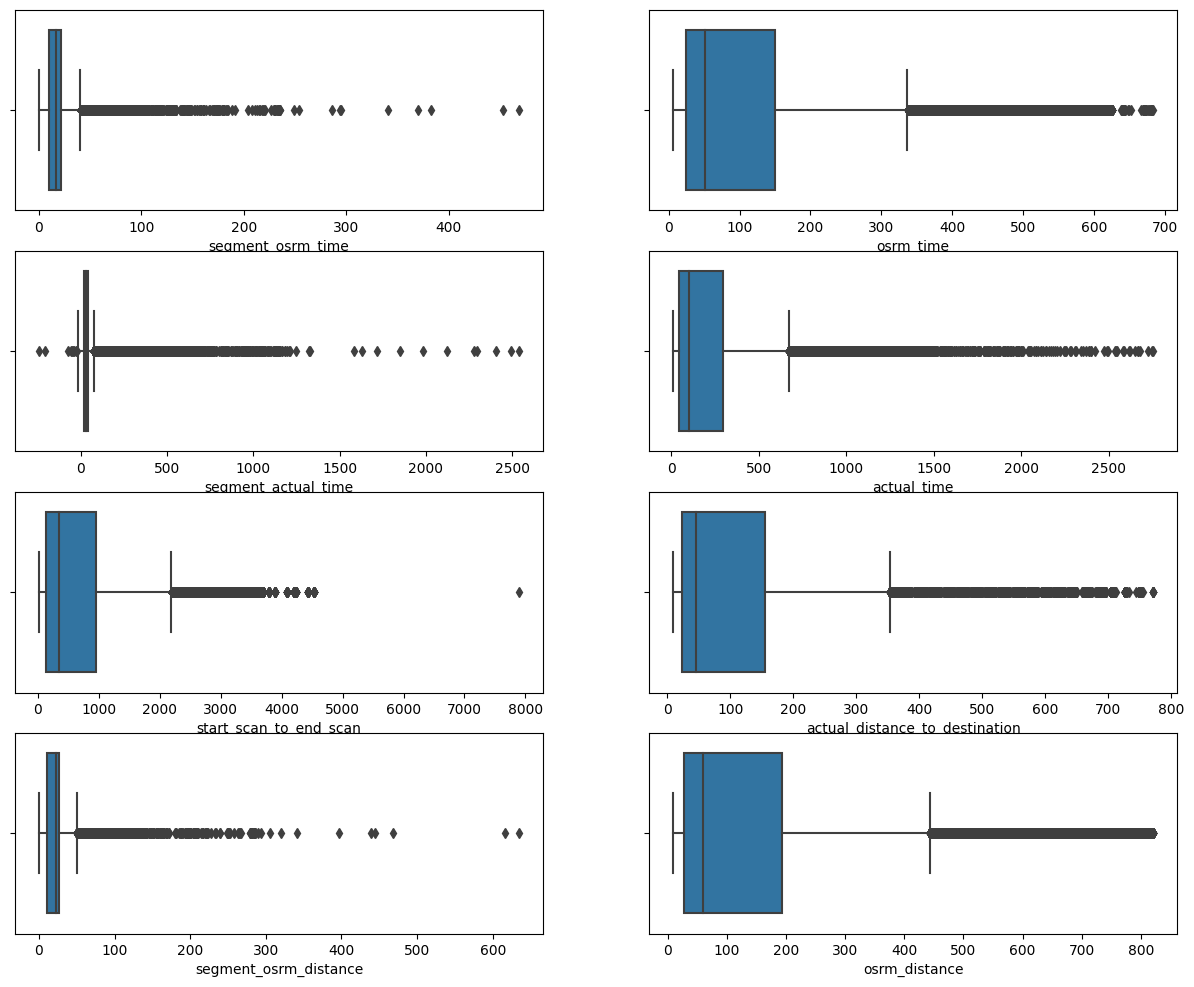

In [ ]:
#Removing the outliers
num_cols = ['segment_osrm_time', 'osrm_time',
            'segment_actual_time', 'actual_time',
            'start_scan_to_end_scan', 'actual_distance_to_destination',
            'segment_osrm_distance', 'osrm_distance']
for col in num_cols:
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3 - Q1
  # Filtering out the outliers
  data_filtered = df[(df[col] >= (Q1 - 1.5 * IQR)) & (df[col] <= (Q3 + 1.5 * IQR))]
# Box plot for each numerical column
fig, axis = plt.subplots(nrows=4, ncols=2, figsize=(15, 12))
idx = 0
for row in range(4):
    for col in range(2):
        sns.boxplot(data=data_filtered, x=num_cols[idx], ax=axis[row, col])
        idx += 1
plt.show()

In [ ]:
#Converting time values to date and time
df["trip_creation_time"] = pd.to_datetime(df["trip_creation_time"])
df["od_start_time"] = pd.to_datetime(df["od_start_time"])
df["od_end_time"] = pd.to_datetime(df["od_end_time"])
df["cutoff_timestamp"] = pd.to_datetime(df["cutoff_timestamp"])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144316 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   data                            144316 non-null  object        
 1   trip_creation_time              144316 non-null  datetime64[ns]
 2   route_schedule_uuid             144316 non-null  object        
 3   route_type                      144316 non-null  object        
 4   trip_uuid                       144316 non-null  object        
 5   source_center                   144316 non-null  object        
 6   source_name                     144316 non-null  object        
 7   destination_center              144316 non-null  object        
 8   destination_name                144316 non-null  object        
 9   od_start_time                   144316 non-null  datetime64[ns]
 10  od_end_time                     144316 non-null  datetim

In [ ]:
# Checking for missing values and data types in 'actual_time' and 'osrm_time'
missing_values_dist = df[['actual_time', 'osrm_time']].isnull().sum()
print("Missing Values:")
print("*********************")
print(missing_values_dist)
print("*********************")

Missing Values:
*********************
actual_time    0
osrm_time      0
dtype: int64
*********************


In [ ]:
# Calculating descriptive statistics for actual_time and osrm_time
descriptive_stats_dist = df[['actual_time', 'osrm_time']].describe()

# Including additional statistics: median and variance
descriptive_stats_dist.loc['median'] = df[['actual_time', 'osrm_time']].median()
descriptive_stats_dist.loc['variance'] = df[['actual_time', 'osrm_time']].var()

print(descriptive_stats_dist)

            actual_time      osrm_time
count     144316.000000  144316.000000
mean         417.996237     214.437055
std          598.940065     308.448543
min            9.000000       6.000000
25%           51.000000      27.000000
50%          132.000000      64.000000
75%          516.000000     259.000000
max         4532.000000    1686.000000
median       132.000000      64.000000
variance  358729.201185   95140.503698


In [ ]:
#Percentage of Trips with Longer Actual Time than estimated.
df[df['actual_time'] - df['osrm_time'] > 0]['osrm_time'].count() * 100 / df.shape[0]


97.85332187699215

**Observations:**
The actual time is generally longer than the OSRM estimated time, as indicated by the higher mean and median.

There is a significant spread in both actual and estimated times, shown by the large standard deviations.

The maximum actual time is substantially higher than the maximum estimated time, suggesting some trips may take considerably longer than expected.

Percentage of Trips with Longer Actual Time: Approximately 97.84% of the trips have an actual time that is longer than the OSRM estimated time. This indicates that the OSRM estimates are generally lower than the actual times experienced.

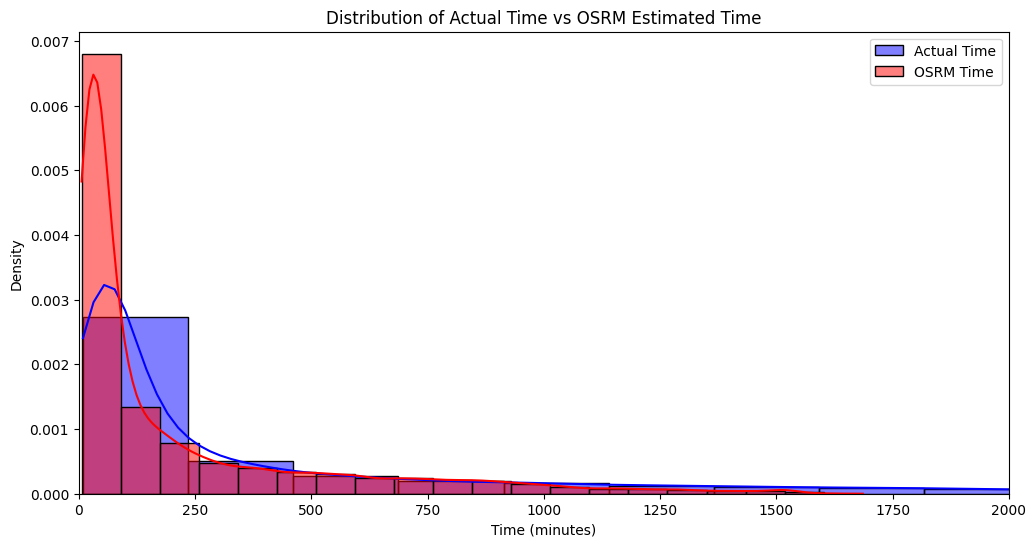

In [ ]:
# Visualization - to compare the actual and estimated trip times.
#This will help us to understand the distribution of these times and their deviations more clearly.
#Let's create a histogram that shows the distribution of both actual and OSRM times.

plt.figure(figsize=(12, 6))

# Plotting histograms for actual time and OSRM time
sns.histplot(df['actual_time'], color="blue", label='Actual Time', kde=True, stat="density", bins=20)
sns.histplot(df['osrm_time'], color="red", label='OSRM Time', kde=True, stat="density", bins=20)

plt.title('Distribution of Actual Time vs OSRM Estimated Time')
plt.xlabel('Time (minutes)')
plt.ylabel('Density')
plt.legend()
plt.xlim(0, 2000)  # Limiting x-axis for better visibility
plt.show()

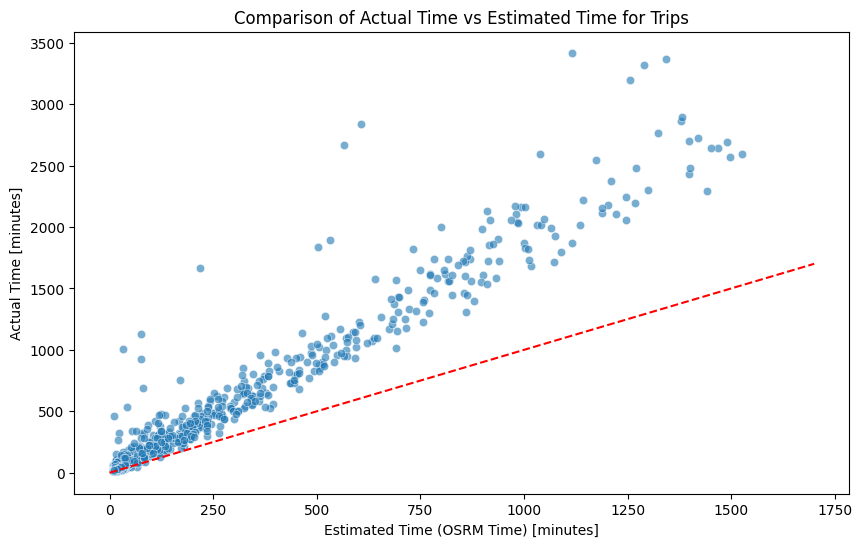

Average Percentage Difference: 112.01783547468558


In [ ]:
# Scatter plot to compare actual_time and osrm_time
plt.figure(figsize=(10, 6))
sns.scatterplot(x='osrm_time', y='actual_time', data=df.sample(1000), alpha=0.6)  # Sampled data for better visualization
plt.xlabel('Estimated Time (OSRM Time) [minutes]')
plt.ylabel('Actual Time [minutes]')
plt.title('Comparison of Actual Time vs Estimated Time for Trips')
plt.plot([0, 1700], [0, 1700], color='red', linestyle='--')  # Reference line where actual time equals estimated time
plt.show()

# Calculating the percentage difference between actual and estimated times
df['time_difference'] = (df['actual_time'] - df['osrm_time']) / df['osrm_time'] * 100
avg_percentage_difference = df['time_difference'].mean()

print("Average Percentage Difference:", avg_percentage_difference)


In [ ]:
#For the distance analysis, we'll compare the actual distances traveled in trips to the estimated distances.
#This analysis can help us understand the accuracy of the distance estimations and identify any significant discrepancies.

In [ ]:
# Checking for missing values and data types in 'actual_distance_to_destination' and 'osrm_distance'
missing_values_dist = df[['actual_distance_to_destination', 'osrm_distance']].isnull().sum()
print("Missing Values:")
print("*********************")
print(missing_values_dist)
print("*********************")


Missing Values:
*********************
actual_distance_to_destination    0
osrm_distance                     0
dtype: int64
*********************


In [ ]:
# Calculating descriptive statistics for actual_distance_to_destination and osrm_distance
descriptive_stats_dist = df[['actual_distance_to_destination', 'osrm_distance']].describe()

# Including additional statistics: median and variance
descriptive_stats_dist.loc['median'] = df[['actual_distance_to_destination', 'osrm_distance']].median()
descriptive_stats_dist.loc['variance'] = df[['actual_distance_to_destination', 'osrm_distance']].var()

print(descriptive_stats_dist)


          actual_distance_to_destination  osrm_distance
count                      144316.000000  144316.000000
mean                          234.708498     285.549785
std                           345.480571     421.717826
min                             9.000045       9.008200
25%                            23.352027      29.896250
50%                            66.135322      78.624400
75%                           286.919294     346.305400
max                          1927.447705    2326.199100
median                         66.135322      78.624400
variance                   119356.825229  177845.924472


In [ ]:
#Percentage of Trips with Shorter Actual Distances than estimated.
x = df[df['actual_distance_to_destination'] - df['osrm_distance'] < 0]['actual_distance_to_destination'].count() * 100 / df.shape[0]
np.round(x , 4)

99.9986

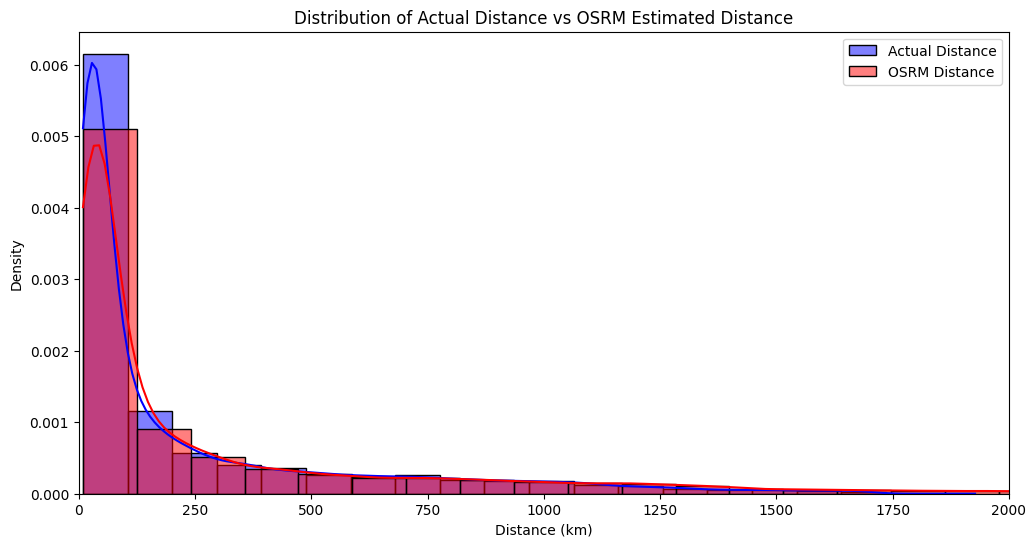

In [ ]:
# Visualization - to compare the actual and estimated trip distances.
#This will help us to understand the distribution of these distances and their deviations more clearly.
#Let's create a histogram that shows the distribution of both actual and OSRM distances.

plt.figure(figsize=(12, 6))

# Plotting histograms for actual time and OSRM time
sns.histplot(df['actual_distance_to_destination'], color="blue", label='Actual Distance', kde=True, stat="density", bins=20)
sns.histplot(df['osrm_distance'], color="red", label='OSRM Distance', kde=True, stat="density", bins=20)

plt.title('Distribution of Actual Distance vs OSRM Estimated Distance')
plt.xlabel('Distance (km)')
plt.ylabel('Density')
plt.legend()
plt.xlim(0, 2000)  # Limiting x-axis for better visibility
plt.show()

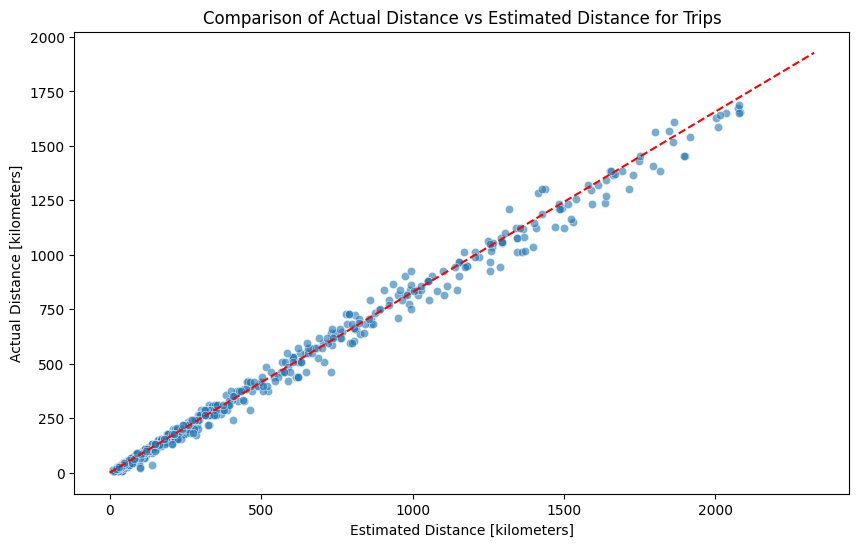

Average Percentage Difference in Distance: -18.275091205654363


In [ ]:
# Scatter plot for distance comparison
plt.figure(figsize=(10, 6))
sns.scatterplot(x='osrm_distance', y='actual_distance_to_destination', data=df.sample(1000), alpha=0.6)
plt.xlabel('Estimated Distance [kilometers]')
plt.ylabel('Actual Distance [kilometers]')
plt.title('Comparison of Actual Distance vs Estimated Distance for Trips')
plt.plot([0, max(df['osrm_distance'])], [0, max(df['actual_distance_to_destination'])], color='red', linestyle='--')
plt.show()

# Calculating the percentage difference between actual and estimated distances
df['distance_difference'] = (df['actual_distance_to_destination'] - df['osrm_distance']) / df['osrm_distance'] * 100
avg_distance_difference = df['distance_difference'].mean()

print("Average Percentage Difference in Distance:", avg_distance_difference)


# Observations:

**The actual distance is generally shorter than the OSRM estimated distance, as indicated by the lower mean and median, however, it is not by that big a margin, as can be seen in the higher correlation.**

There is a significant spread in both actual and estimated distances, shown by the large standard deviations.

Percentage of Trips with shorter Actual Distance: Almost 99.998% of the trips (almost all) have an actual distance that is shorter than the OSRM estimated distance. This indicates that the OSRM estimates are generally higher than the actual distances.

In [ ]:
#Analyze the frequency and performance metrics of different route types, we will focus on the route_type column in the dataset.
route_type_counts = df['route_type'].value_counts()
print(route_type_counts)

FTL        99132
Carting    45184
Name: route_type, dtype: int64


In [ ]:
# Preparing the data for the plot
route_type_performance_plot_data = df.groupby('route_type').mean()[['actual_time', 'osrm_time', 'actual_distance_to_destination', 'osrm_distance']]
route_type_performance_plot_data

<ipython-input-193-e9d32d644e6c>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  route_type_performance_plot_data = df.groupby('route_type').mean()[['actual_time', 'osrm_time', 'actual_distance_to_destination', 'osrm_distance']]


,actual_time,osrm_time,actual_distance_to_destination,osrm_distance
route_type,,,,
Carting,70.639297,30.448278,26.612886,34.308201
FTL,576.320250,298.298461,329.557711,400.064773


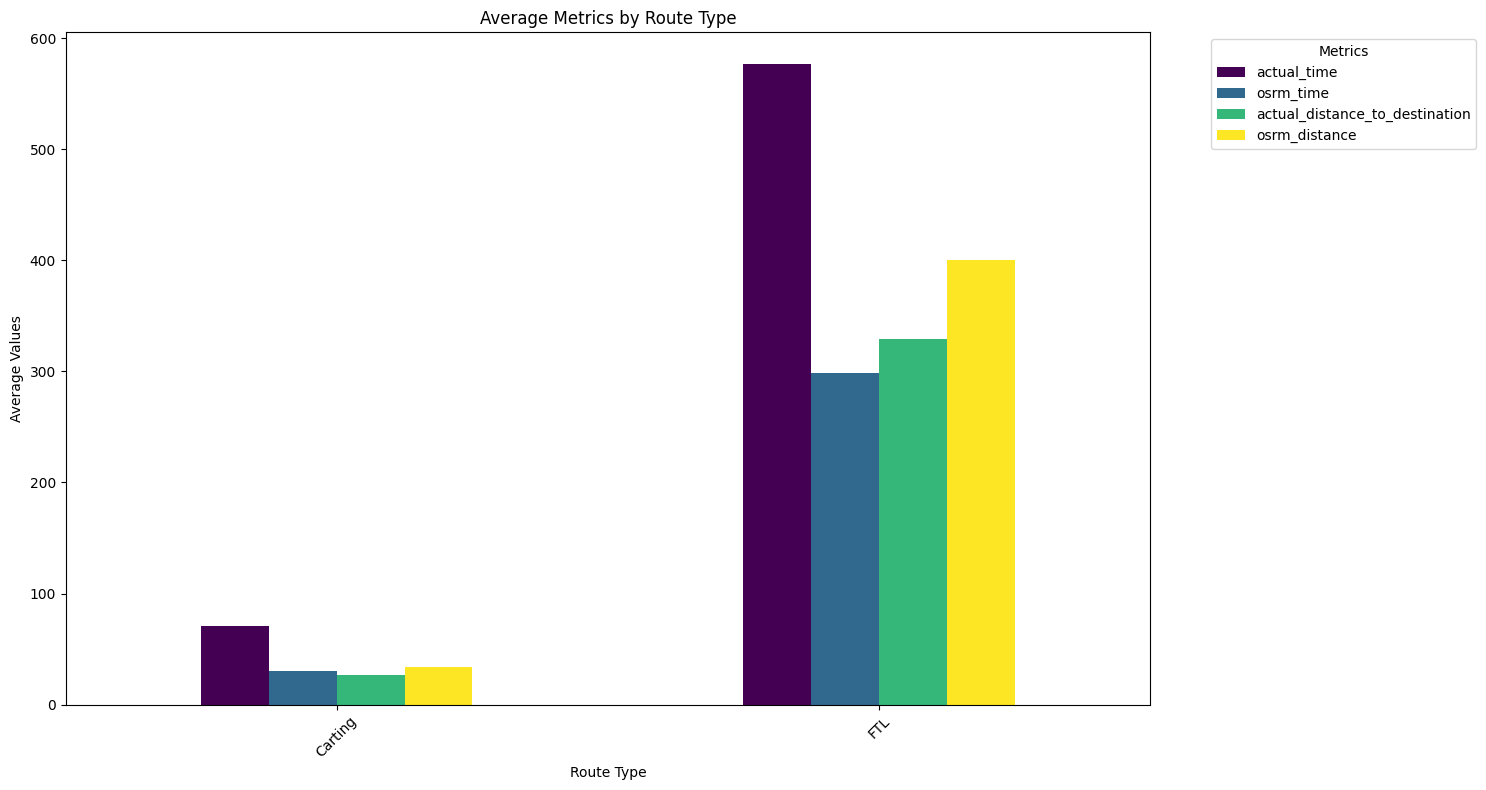

In [ ]:
# Plot all the average values across route_types
ax = route_type_performance_plot_data.plot(kind='bar', figsize=(15, 8), rot=45, colormap='viridis')
plt.title('Average Metrics by Route Type')
plt.xlabel('Route Type')
plt.ylabel('Average Values')
plt.legend(title='Metrics', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [ ]:
#Analyze the frequency and performance metrics of different route types, we will focus on the route_type column in the dataset.
data_counts = df['data'].value_counts()
print(data_counts)

training    104632
test         39684
Name: data, dtype: int64


In [ ]:
# Preparing the data for the plot
data_performance_plot_data = df.groupby('data').mean()[['actual_time', 'osrm_time', 'actual_distance_to_destination', 'osrm_distance']]
data_performance_plot_data

<ipython-input-196-1de94eb30c7c>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_performance_plot_data = df.groupby('data').mean()[['actual_time', 'osrm_time', 'actual_distance_to_destination', 'osrm_distance']]


,actual_time,osrm_time,actual_distance_to_destination,osrm_distance
data,,,,
test,436.748866,223.380884,245.485467,298.532404
training,410.883888,211.044910,230.621094,280.625840


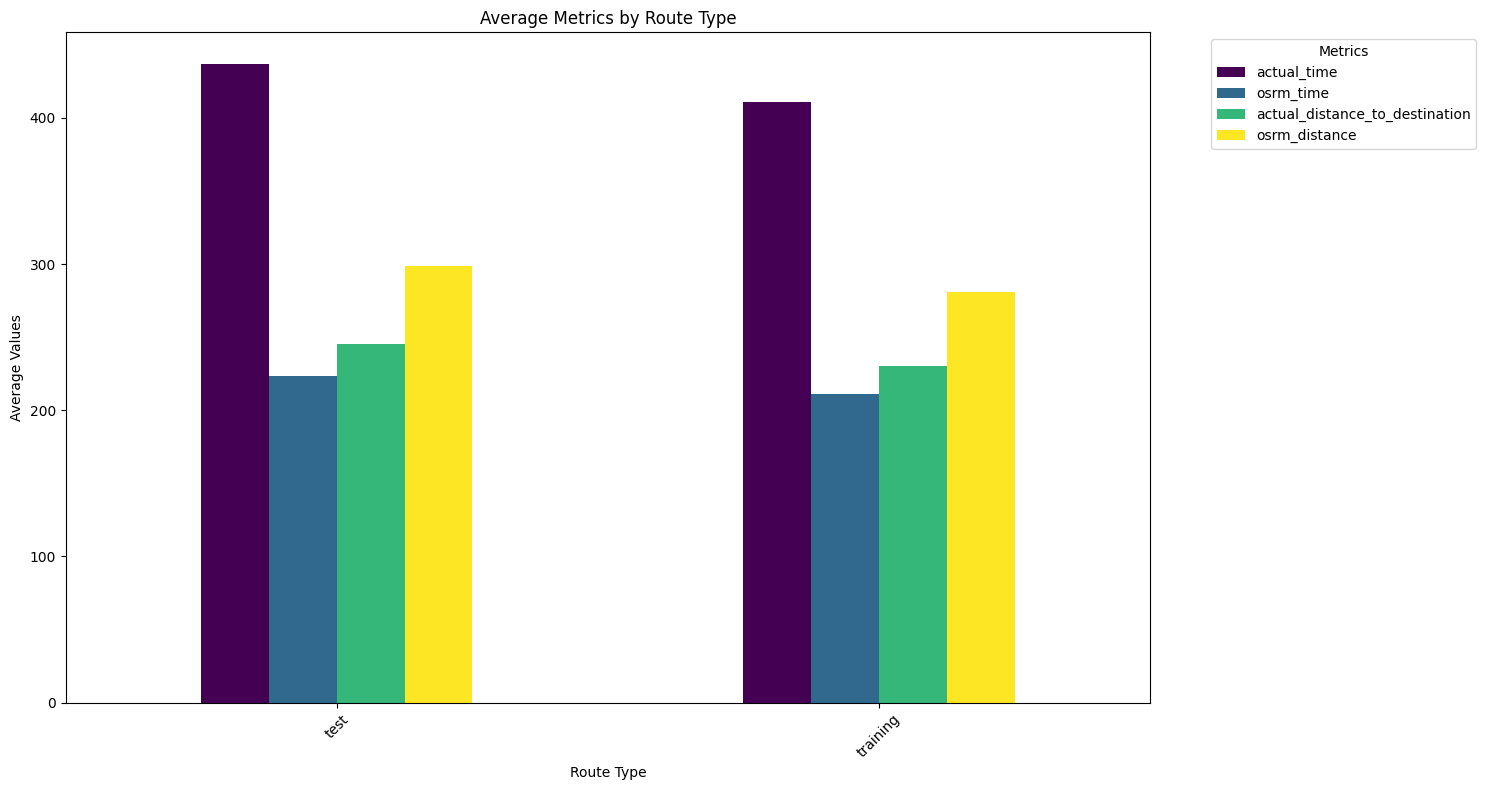

In [ ]:
# Plot all the average values across route_types
ax = data_performance_plot_data.plot(kind='bar', figsize=(15, 8), rot=45, colormap='viridis')
plt.title('Average Metrics by Route Type')
plt.xlabel('Route Type')
plt.ylabel('Average Values')
plt.legend(title='Metrics', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [ ]:
# Preparing the data for the plot
is_cutOff_performance_plot_data = df.groupby('is_cutoff').mean()[['actual_time', 'osrm_time', 'actual_distance_to_destination', 'osrm_distance']]
is_cutOff_performance_plot_data

<ipython-input-198-886ce3d0dc10>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  is_cutOff_performance_plot_data = df.groupby('is_cutoff').mean()[['actual_time', 'osrm_time', 'actual_distance_to_destination', 'osrm_distance']]


,actual_time,osrm_time,actual_distance_to_destination,osrm_distance
is_cutoff,,,,
False,202.530562,91.473941,93.241950,115.863163
True,465.300509,241.432911,265.766679,322.803524


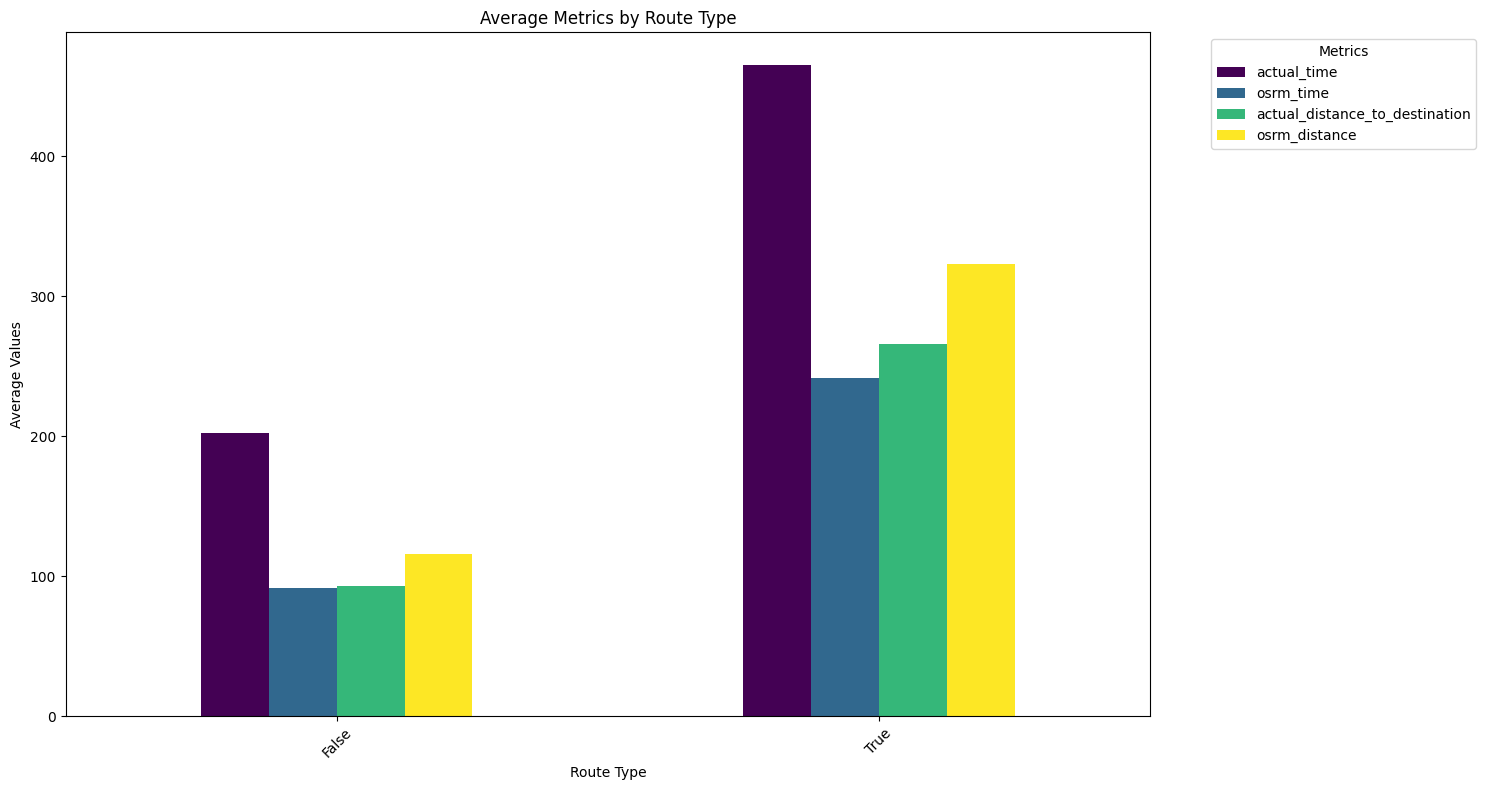

In [ ]:
# Plot all the average values across route_types
ax = is_cutOff_performance_plot_data.plot(kind='bar', figsize=(15, 8), rot=45, colormap='viridis')
plt.title('Average Metrics by Route Type')
plt.xlabel('Route Type')
plt.ylabel('Average Values')
plt.legend(title='Metrics', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
#Temporal Analysis:
df['hour_of_day'] = df['trip_creation_time'].dt.hour
df['day_of_week'] = df['trip_creation_time'].dt.dayofweek  # Monday=0, Sunday=6
df['month'] = df['trip_creation_time'].dt.month


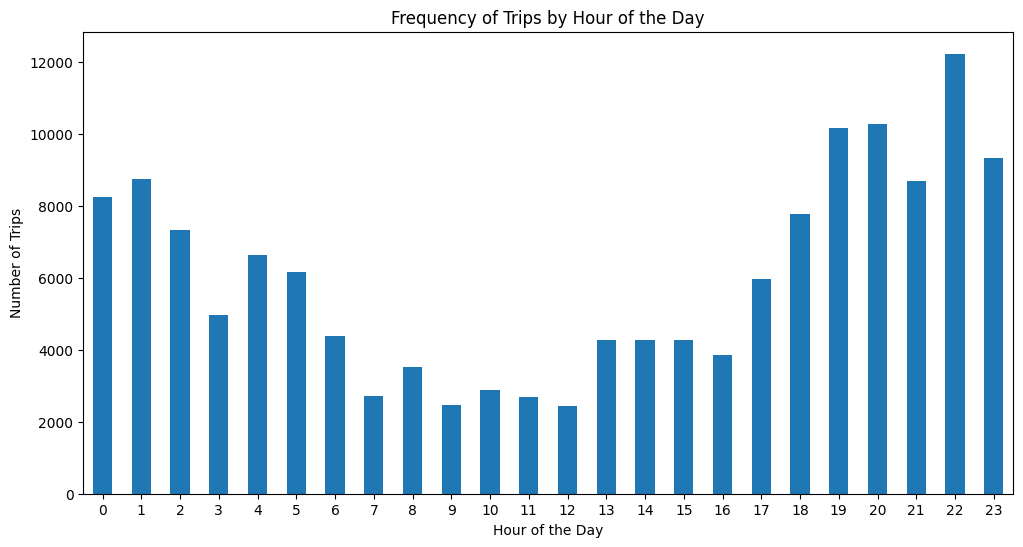

In [ ]:
hourly_counts = df['hour_of_day'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
hourly_counts.plot(kind='bar')
plt.title('Frequency of Trips by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Trips')
plt.xticks(rotation=0)
plt.show()


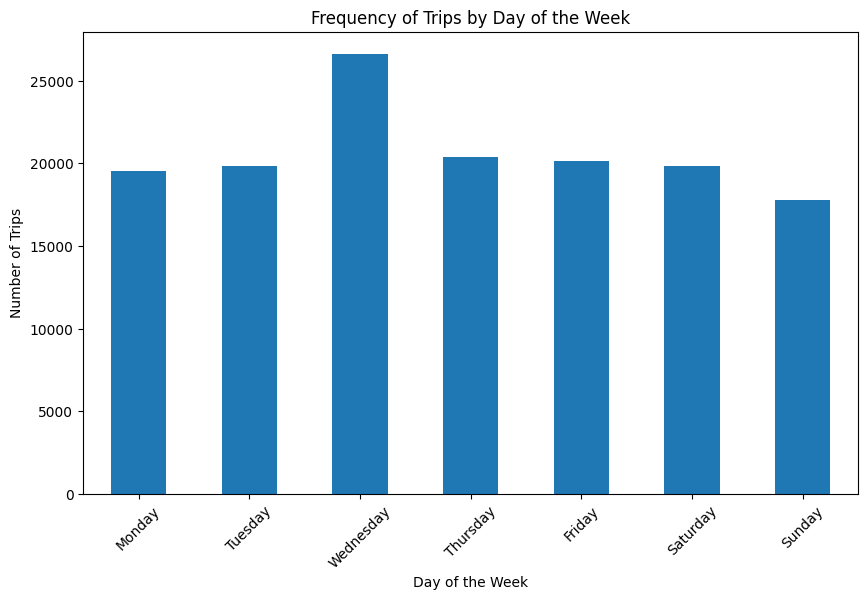

In [ ]:
day_of_week_counts = df['day_of_week'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
day_of_week_counts.plot(kind='bar')
plt.title('Frequency of Trips by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Trips')
plt.xticks(ticks=range(0, 7), labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], rotation=45)
plt.show()


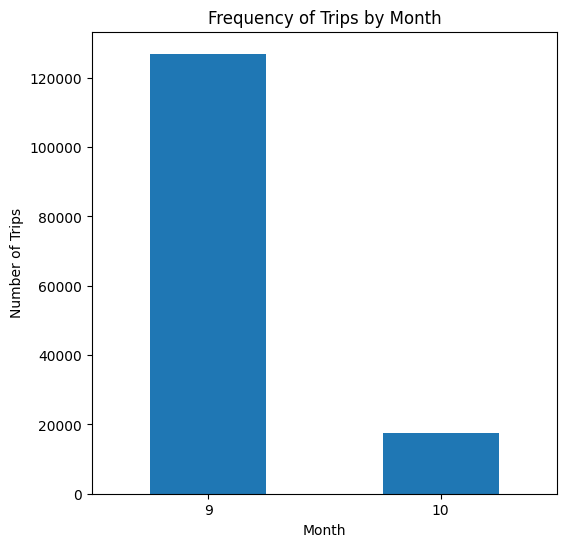

In [ ]:
monthly_counts = df['month'].value_counts().sort_index()
plt.figure(figsize=(6, 6))
monthly_counts.plot(kind='bar')
plt.title('Frequency of Trips by Month')
plt.xlabel('Month')
plt.ylabel('Number of Trips')
plt.xticks(rotation=0)
plt.show()


# Observations:

Hourly Analysis: The plot for 'Frequency of Trips by Hour of the Day' shows a higher number of trips during hours between 17:00 PM - 05:00 AM indicating the peak business hours.

Day of the Week Analysis: The 'Frequency of Trips by Day of the Week' plot shows variations in trip frequency on weekends versus weekdays. The chart shows almost constant demand on all days except Wed and Sun. Wednesday is the peak day, and Sunday is the most relaxed day as far as the operational demand is concerned.

Monthly Analysis: The 'Frequency of Trips by Month' plot highlights seasonal trends or monthly variations, but it seems that data only covers months 9(SEP) & 10(OCT).

In [ ]:
# The 'Factor' impact
factor_descriptive_stats = df['factor'].describe()
print(factor_descriptive_stats)

count    144316.000000
mean          2.120178
std           1.717065
min           0.144000
25%           1.604545
50%           1.857143
75%           2.212280
max          77.387097
Name: factor, dtype: float64


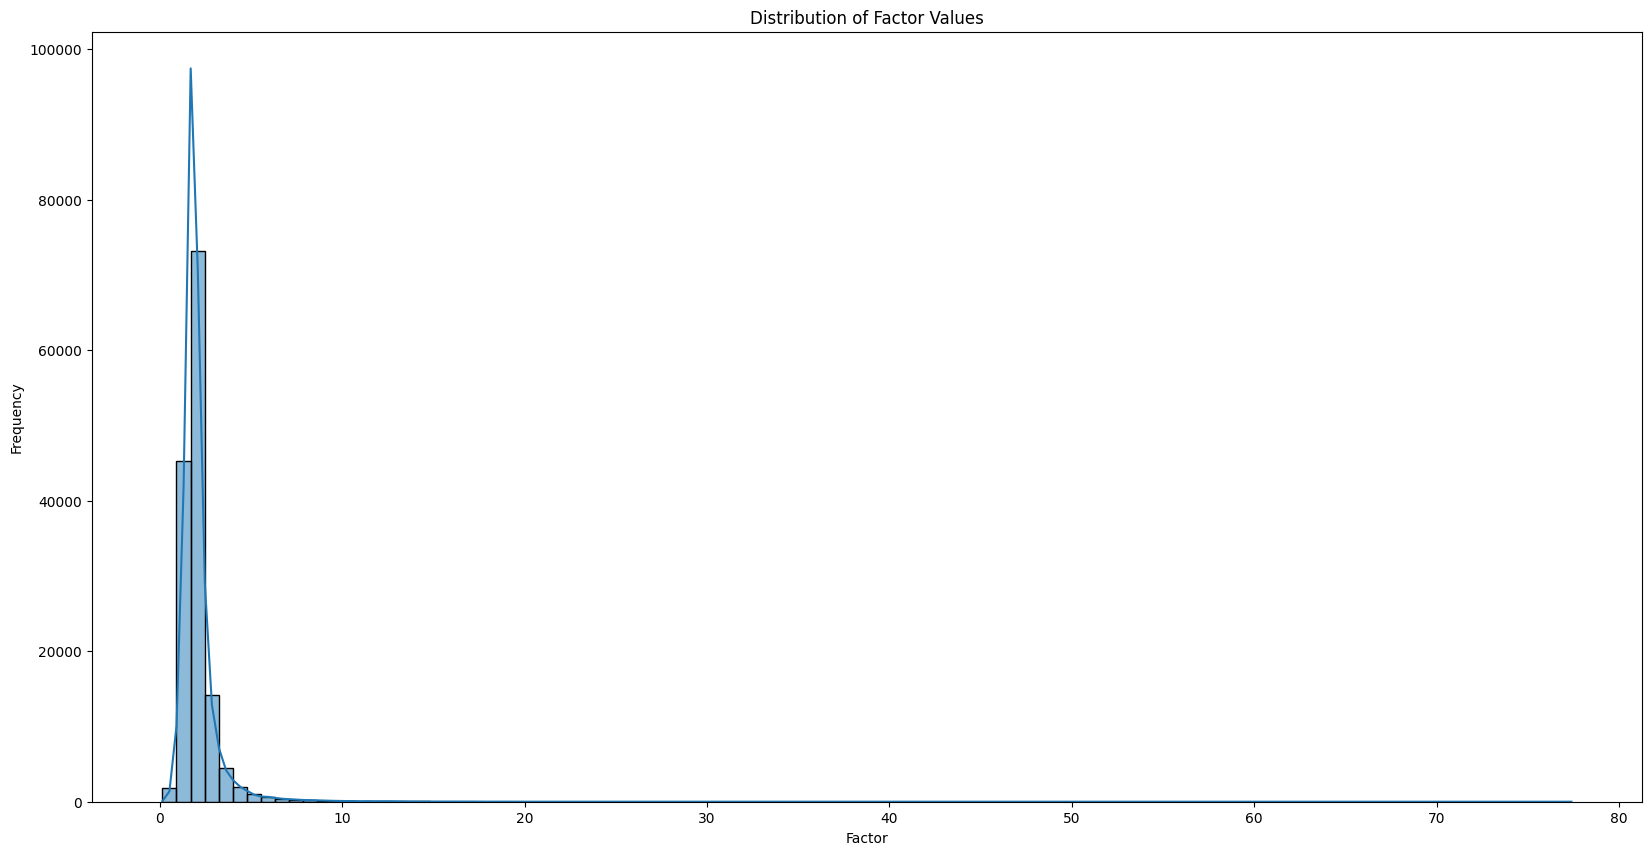

In [ ]:
#Distribution of 'factor' values
plt.figure(figsize=(20, 10))
sns.histplot(df['factor'], kde=True, bins = 100)
plt.title('Distribution of Factor Values')
plt.xlabel('Factor')
plt.ylabel('Frequency')
plt.show()


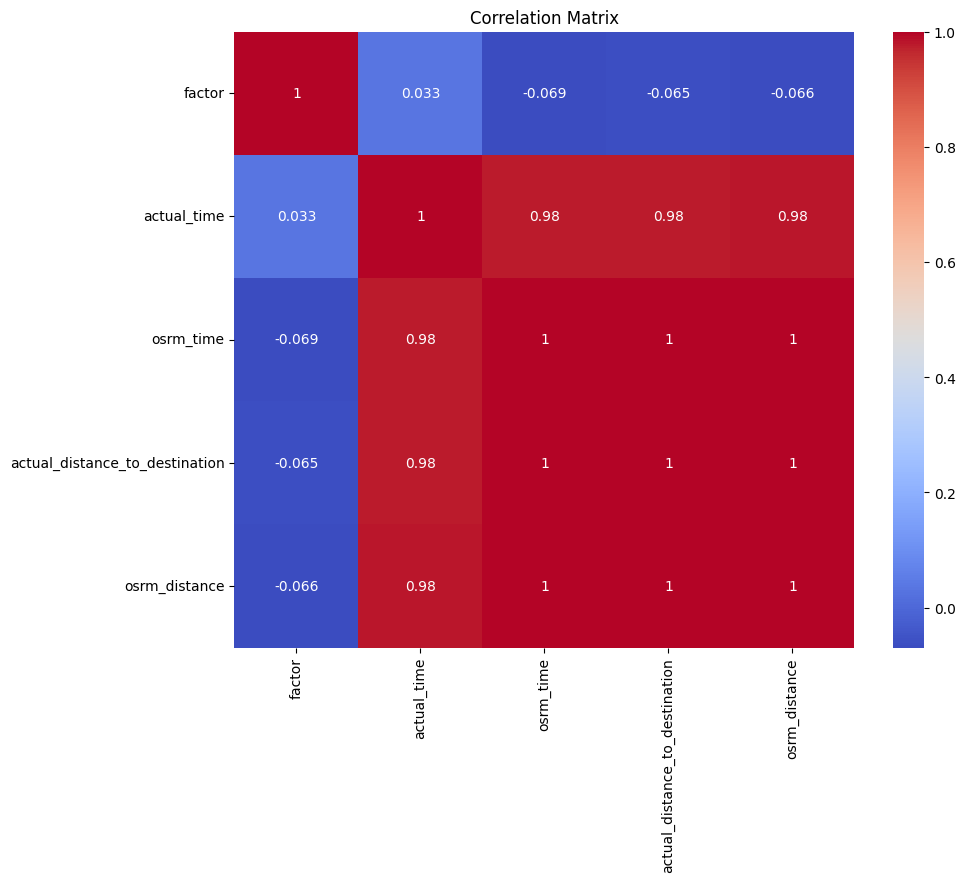

In [ ]:
# Selecting relevant columns for correlation analysis
columns_for_correlation = ['factor', 'actual_time', 'osrm_time', 'actual_distance_to_destination', 'osrm_distance']
correlation_matrix = df[columns_for_correlation].corr()

# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


#Observations:

It is clear from the correlation graph that "Factor" doesn't have any strong correlation with distance and time attributes.

In [ ]:
df.nunique()

data                                   2
trip_creation_time                 14787
route_schedule_uuid                 1497
route_type                             2
trip_uuid                          14787
source_center                       1496
source_name                         1496
destination_center                  1466
destination_name                    1466
od_start_time                      26223
od_end_time                        26223
start_scan_to_end_scan              1914
is_cutoff                              2
cutoff_factor                        501
cutoff_timestamp                   92894
actual_distance_to_destination    143965
actual_time                         3182
osrm_time                           1531
osrm_distance                     137544
factor                             45588
segment_actual_time                  746
segment_osrm_time                    214
segment_osrm_distance             113497
segment_factor                      5663
time_difference 

#HINTS:

You can use inbuilt functions like groupby and aggregations like sum(), cumsum() to merge some rows based on their

1. Trip_uuid, Source ID and Destination ID

2. Further aggregate on the basis of just Trip_uuid.

You can also keep the first and last values for some numeric/categorical fields if aggregating them won’t make sense.

In [ ]:
#Grouping by segments in the trip
df_segment=df.copy()
df_segment['segment_key'] = df_segment['trip_uuid'] + df_segment['source_center'] + df_segment['destination_center']
segment_cols = ['segment_actual_time','segment_osrm_distance', 'segment_osrm_time']
#Total - Cumulative sum for each of the 3 segment columns grouped by segment key
for col in segment_cols:
    df_segment[col + '_sum'] = df_segment.groupby('segment_key')[col].cumsum()

df_segment[[col + '_sum' for col in segment_cols]]

,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum
0,14.0,11.9653,11.0
1,24.0,21.7243,20.0
2,40.0,32.5395,27.0
3,61.0,45.5619,39.0
4,67.0,49.4772,44.0
...,...,...,...
144862,92.0,65.3487,94.0
144863,118.0,82.7212,115.0
144864,138.0,103.4265,149.0
144865,155.0,122.3150,176.0


In [ ]:
my_segment_dict = {

    'data' : 'first',
    'trip_creation_time' : 'first',
    'route_schedule_uuid' : 'first',
    'route_type' : 'first',
    'trip_uuid' : 'first',
    'source_center' : 'first',
    'source_name' : 'first',

    'destination_center' : 'last',
    'destination_name' : 'last',

    'od_start_time' : 'first',
    'od_end_time' : 'first',
    'start_scan_to_end_scan' : 'first',

    'actual_distance_to_destination' : 'last',
    'actual_time' : 'last',

    'osrm_time' : 'last',
    'osrm_distance' : 'last',

    'segment_actual_time_sum' : 'last',
    'segment_osrm_distance_sum' : 'last',
    'segment_osrm_time_sum' : 'last'
}

In [ ]:
#Aggregation at the level of segment keys & sorting in increasing order. Segment key is a combination.
segment = df_segment.groupby('segment_key').agg(my_segment_dict).reset_index()
segment = segment.sort_values(by=['segment_key', 'od_end_time'], ascending=True).reset_index(drop=True)
segment.head(5)

,segment_key,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum
0,trip-153671041653548748IND209304AAAIND000000ACB,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,2018-09-13 13:40:23.123744,1260.0,383.759164,732.0,329.0,446.5496,728.0,670.6205,534.0
1,trip-153671041653548748IND462022AAAIND209304AAA,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,999.0,440.973689,830.0,388.0,544.8027,820.0,649.8528,474.0
2,trip-153671042288605164IND561203AABIND562101AAA,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND562101AAA,Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 02:03:09.655591,2018-09-12 03:01:59.598855,58.0,24.644021,47.0,26.0,28.1994,46.0,28.1995,26.0
3,trip-153671042288605164IND572101AAAIND561203AAB,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND572101AAA,Tumkur_Veersagr_I (Karnataka),IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),2018-09-12 00:00:22.886430,2018-09-12 02:03:09.655591,122.0,48.542890,96.0,42.0,56.9116,95.0,55.9899,39.0
4,trip-153671043369099517IND000000ACBIND160002AAC,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,trip-153671043369099517,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),2018-09-14 03:40:17.106733,2018-09-14 17:34:55.442454,834.0,237.439610,611.0,212.0,281.2109,608.0,317.7408,231.0


In [ ]:
segment['od_timediff_in_hrs']=(segment['od_end_time']-segment['od_start_time']).dt.total_seconds()/3600
segment['od_timediff_in_hrs']

0        21.010074
1        16.658423
2         0.980540
3         2.046325
4        13.910649
           ...    
26217     1.035253
26218     1.518130
26219     0.736240
26220     4.791233
26221     1.115559
Name: od_timediff_in_hrs, Length: 26222, dtype: float64

In [ ]:
segment['trip_uuid'].value_counts().sort_values()

trip-153697533422394237    1
trip-153680931806467130    1
trip-153835260728391532    1
trip-153680923923923147    1
trip-153835263861750021    1
                          ..
trip-153749764969514534    7
trip-153818467050084470    7
trip-153758895506669465    8
trip-153710494321650505    8
trip-153717306559016761    8
Name: trip_uuid, Length: 14787, dtype: int64

1    8971
2    2700
3    1468
4    1022
5     461
6     104
7      58
8       3
Name: trip_uuid, dtype: int64


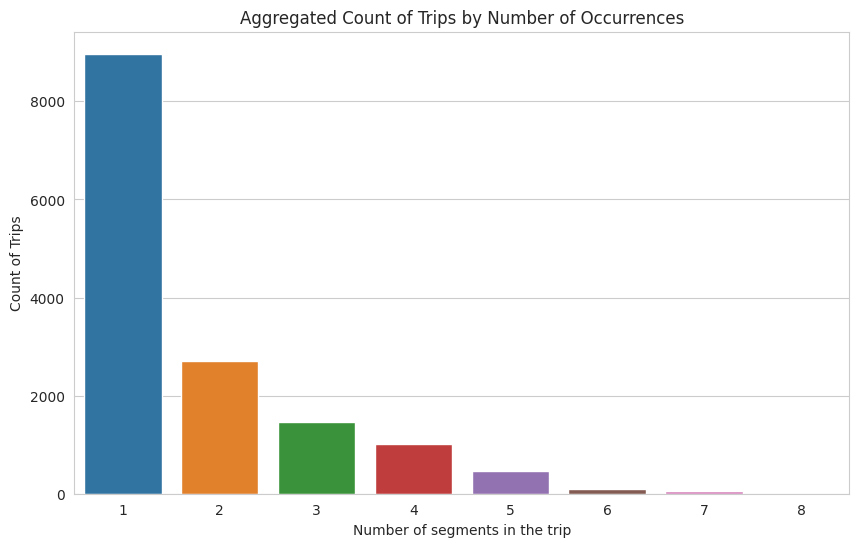

In [ ]:
#Plot'Trips by number of segments."

# Aggregating trips by the number of occurrences
trip_counts = segment['trip_uuid'].value_counts()
aggregated_trips = trip_counts.value_counts().sort_index()
print(aggregated_trips)
# Creating a count plot for the aggregated trips
plt.figure(figsize=(10, 6))
sns.barplot(x=aggregated_trips.index, y=aggregated_trips.values)
plt.title('Aggregated Count of Trips by Number of Occurrences')
plt.xlabel('Number of segments in the trip')
plt.ylabel('Count of Trips')
plt.show()


In [ ]:
#Aggregation at the trip_uuid level
my_trip_dict =                                    {
                                                      'trip_uuid': 'first',
                                                       'data' : 'first',
                                                       'route_type' : 'first',
                                                       'trip_creation_time' : 'first',
                                                       'source_name' : 'first',
                                                       'destination_name' : 'last',
                                                       'od_start_time' : 'first',
                                                       'od_end_time' : 'last',
                                                       'start_scan_to_end_scan' : 'first',
                                                       'actual_distance_to_destination' : 'last',
                                                       'actual_time' : 'last',
                                                       'osrm_time' : 'last',
                                                       'osrm_distance' : 'last',
                                                       'segment_actual_time' : 'sum',
                                                       'segment_osrm_time' : 'sum',
                                                       'segment_osrm_distance' : 'sum'
                                                    }
trip_aggregated_data = df.groupby(by=['trip_uuid']).agg(my_trip_dict).reset_index(drop=True)
trip_aggregated_data

,trip_uuid,data,route_type,trip_creation_time,source_name,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
0,trip-153671041653548748,training,FTL,2018-09-12 00:00:16.535741,Bhopal_Trnsport_H (Madhya Pradesh),Gurgaon_Bilaspur_HB (Haryana),2018-09-12 00:00:16.535741,2018-09-13 13:40:23.123744,999.0,383.759164,732.0,329.0,446.5496,1548.0,1008.0,1320.4733
1,trip-153671042288605164,training,Carting,2018-09-12 00:00:22.886430,Tumkur_Veersagr_I (Karnataka),Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 00:00:22.886430,2018-09-12 03:01:59.598855,122.0,24.644021,47.0,26.0,28.1994,141.0,65.0,84.1894
2,trip-153671043369099517,training,FTL,2018-09-12 00:00:33.691250,Bangalore_Nelmngla_H (Karnataka),Chandigarh_Mehmdpur_H (Punjab),2018-09-12 00:00:33.691250,2018-09-14 17:34:55.442454,3099.0,237.439610,611.0,212.0,281.2109,3308.0,1941.0,2545.2678
3,trip-153671046011330457,training,Carting,2018-09-12 00:01:00.113710,Mumbai Hub (Maharashtra),Mumbai_MiraRd_IP (Maharashtra),2018-09-12 00:01:00.113710,2018-09-12 01:41:29.809822,100.0,17.175274,59.0,15.0,19.6800,59.0,16.0,19.8766
4,trip-153671052974046625,training,FTL,2018-09-12 00:02:09.740725,Bellary_Dc (Karnataka),Bellary_Dc (Karnataka),2018-09-12 00:02:09.740725,2018-09-12 12:00:30.683231,152.0,41.317614,131.0,44.0,53.5761,340.0,115.0,146.7919
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14782,trip-153861095625827784,test,Carting,2018-10-03 23:55:56.258533,Chandigarh_Mehmdpur_H (Punjab),Chandigarh_Mehmdpur_H (Punjab),2018-10-03 23:55:56.258533,2018-10-04 06:41:25.409035,152.0,31.261599,49.0,34.0,44.5639,82.0,62.0,64.8551
14783,trip-153861104386292051,test,Carting,2018-10-03 23:57:23.863155,FBD_Balabhgarh_DPC (Haryana),Faridabad_Blbgarh_DC (Haryana),2018-10-03 23:57:23.863155,2018-10-04 00:57:59.294434,60.0,15.513784,21.0,12.0,16.0882,21.0,11.0,16.0883
14784,trip-153861106442901555,test,Carting,2018-10-03 23:57:44.429324,Kanpur_Central_H_6 (Uttar Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),2018-10-03 23:57:44.429324,2018-10-04 06:59:51.621332,173.0,19.349008,190.0,24.0,30.0545,281.0,88.0,104.8866
14785,trip-153861115439069069,test,Carting,2018-10-03 23:59:14.390954,Tirunelveli_VdkkuSrt_I (Tamil Nadu),Tirunelveli_VdkkuSrt_I (Tamil Nadu),2018-10-03 23:59:14.390954,2018-10-04 05:47:45.162682,105.0,33.673835,90.0,48.0,40.6080,258.0,221.0,223.5324


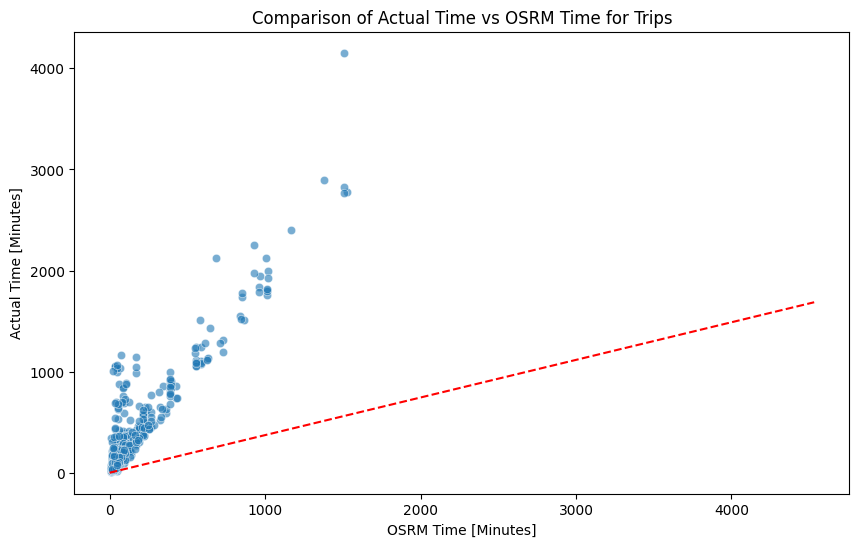

Average Percentage Difference in times: 112.01783547468558


In [ ]:
# Scatter plot for actual_time vs osrm_time comparison
plt.figure(figsize=(10, 6))
sns.scatterplot(x='osrm_time', y='actual_time', data=trip_aggregated_data.sample(1000), alpha=0.6)
plt.xlabel('OSRM Time [Minutes]')
plt.ylabel('Actual Time [Minutes]')
plt.title('Comparison of Actual Time vs OSRM Time for Trips')
plt.plot([0, max(trip_aggregated_data['actual_time'])], [0, max(trip_aggregated_data['osrm_time'])], color='red', linestyle='--')
plt.show()

# Calculating the percentage difference between actual and segment actual times
trip_aggregated_data['time_difference'] = (trip_aggregated_data['actual_time'] - trip_aggregated_data['osrm_time']) / trip_aggregated_data['actual_time'] * 100
avg_time_difference = df['time_difference'].mean()

print("Average Percentage Difference in times:", avg_time_difference)

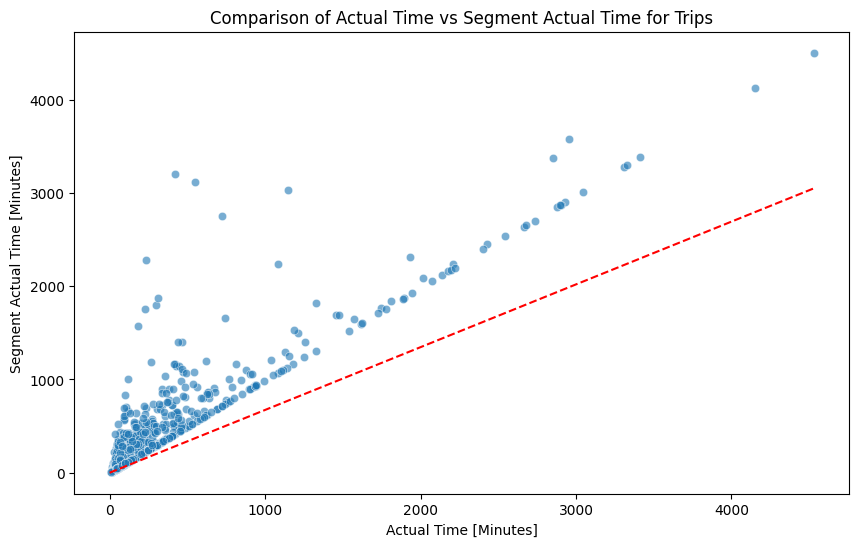

Average Percentage Difference in times: 66.36646447312576


In [ ]:
# Scatter plot for actual_time vs segment_actual_time comparison
plt.figure(figsize=(10, 6))
sns.scatterplot(x='actual_time', y='segment_actual_time', data=trip_aggregated_data.sample(1000), alpha=0.6)
plt.xlabel('Actual Time [Minutes]')
plt.ylabel('Segment Actual Time [Minutes]')
plt.title('Comparison of Actual Time vs Segment Actual Time for Trips')
plt.plot([0, max(df['actual_time'])], [0, max(df['segment_actual_time'])], color='red', linestyle='--')
plt.show()

# Calculating the percentage difference between actual and segment actual times
trip_aggregated_data['time_difference'] = (trip_aggregated_data['segment_actual_time']-trip_aggregated_data['actual_time']) / trip_aggregated_data['actual_time'] * 100
avg_time_difference = trip_aggregated_data['time_difference'].mean()

print("Average Percentage Difference in times:", avg_time_difference)

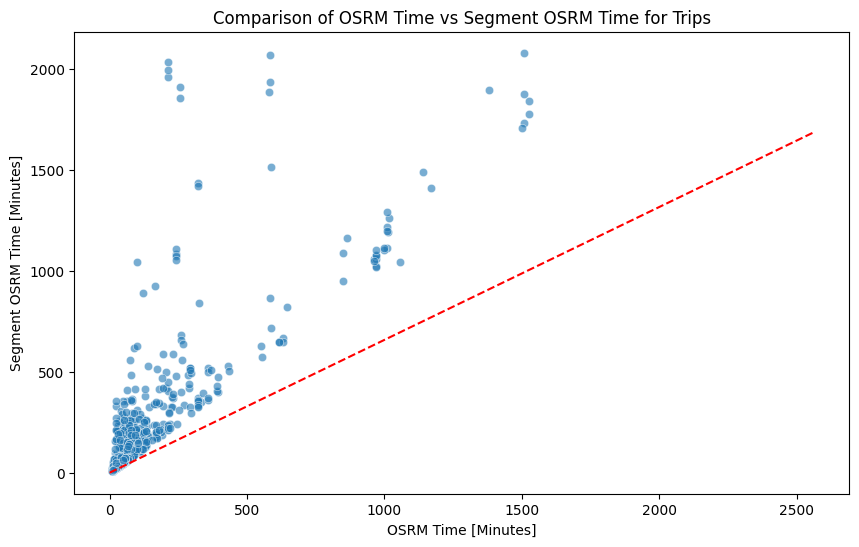

Average Percentage Difference in times: 7859568.628073579


In [ ]:
# Scatter plot for osrm_time vs segment_osrm_time comparison
plt.figure(figsize=(10, 6))
sns.scatterplot(x='osrm_time', y='segment_osrm_time', data=trip_aggregated_data.sample(1000), alpha=0.6)
plt.xlabel('OSRM Time [Minutes]')
plt.ylabel('Segment OSRM Time [Minutes]')
plt.title('Comparison of OSRM Time vs Segment OSRM Time for Trips')
plt.plot([0, max(trip_aggregated_data['segment_osrm_time'])], [0, max(trip_aggregated_data['osrm_time'])], color='red', linestyle='--')
plt.show()

# Calculating the percentage difference between osrm and segment OSRM times
trip_aggregated_data['time_difference'] = (trip_aggregated_data['segment_osrm_time'].sum() - trip_aggregated_data['osrm_time'].max()) / trip_aggregated_data['osrm_time'] * 100
avg_time_difference = trip_aggregated_data['time_difference'].mean()

print("Average Percentage Difference in times:", avg_time_difference)

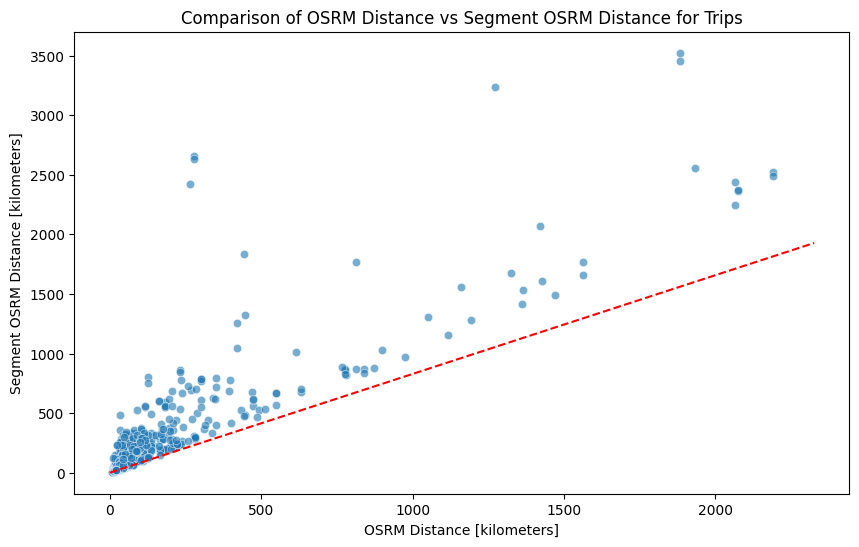

Average Percentage Difference in Distance: 21.379910604135013


In [ ]:
# Scatter plot for distance comparison
plt.figure(figsize=(10, 6))
sns.scatterplot(x='osrm_distance', y='segment_osrm_distance', data=trip_aggregated_data.sample(1000), alpha=0.6)
plt.xlabel('OSRM Distance [kilometers]')
plt.ylabel('Segment OSRM Distance [kilometers]')
plt.title('Comparison of OSRM Distance vs Segment OSRM Distance for Trips')
plt.plot([0, max(trip_aggregated_data['osrm_distance'])], [0, max(trip_aggregated_data['actual_distance_to_destination'])], color='red', linestyle='--')
plt.show()

# Calculating the percentage difference between actual and estimated distances
trip_aggregated_data['distance_difference'] = (trip_aggregated_data['osrm_distance'] - trip_aggregated_data['actual_distance_to_destination']) / trip_aggregated_data['osrm_distance'] * 100
avg_distance_difference = trip_aggregated_data['distance_difference'].mean()

print("Average Percentage Difference in Distance:", avg_distance_difference)

In [ ]:
#One hot encoding for categorical variables
data_encoded = pd.get_dummies(df, columns=['route_type'])

In [ ]:
 #Normalization/Standardization of Numeric Features
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = StandardScaler()
transformed_data = scaler.fit_transform(data_encoded[['segment_osrm_time',
 'osrm_time',
 'segment_actual_time',
 'actual_time',
 'start_scan_to_end_scan',
 'segment_osrm_distance',
 'actual_distance_to_destination',
 'osrm_distance']]
)
std_data = pd.DataFrame(transformed_data, columns=['segment_osrm_time',
 'osrm_time',
 'segment_actual_time',
 'actual_time',
 'start_scan_to_end_scan',
 'segment_osrm_distance',
 'actual_distance_to_destination',
 'osrm_distance'])
std_data.head(2)

,segment_osrm_time,osrm_time,segment_actual_time,actual_time,start_scan_to_end_scan,segment_osrm_distance,actual_distance_to_destination,osrm_distance
0,-0.507359,-0.659552,-0.414306,-0.674521,-0.845502,-0.607495,-0.649164,-0.648741
1,-0.642732,-0.630373,-0.489039,-0.657825,-0.845502,-0.730985,-0.624557,-0.625599


<Axes: title={'center': 'After StandardScaler'}, xlabel='osrm_time', ylabel='Density'>

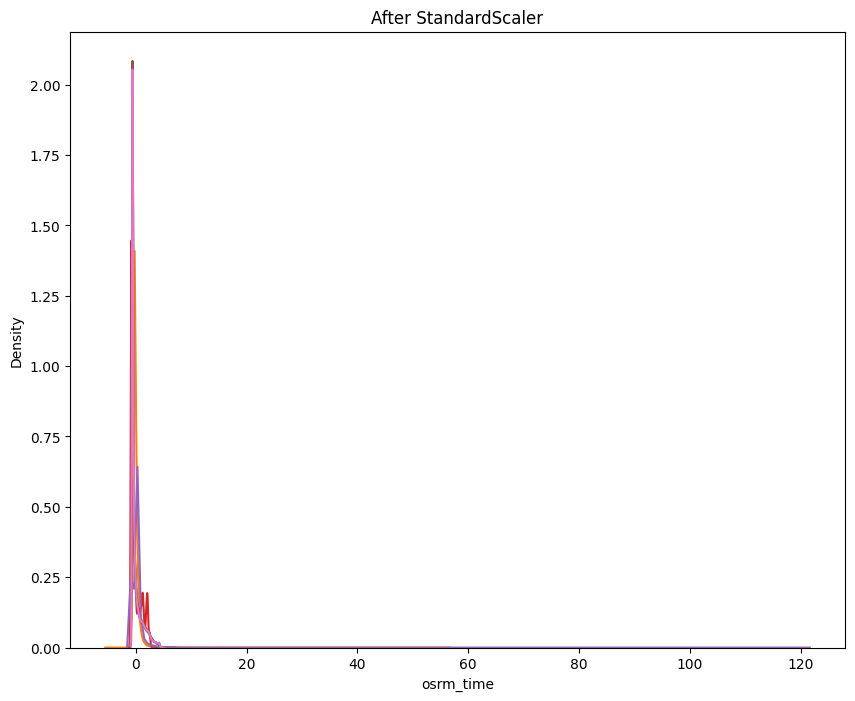

In [ ]:
fig, (ax1) = plt.subplots(ncols=1, figsize=(10,8))
ax1.set_title('After StandardScaler')
sns.kdeplot(std_data['osrm_time'], ax=ax1)
sns.kdeplot(std_data['segment_actual_time'], ax=ax1)
sns.kdeplot(std_data['actual_time'], ax=ax1)
sns.kdeplot(std_data['start_scan_to_end_scan'], ax=ax1)
sns.kdeplot(std_data['segment_osrm_distance'], ax=ax1)
sns.kdeplot(std_data['actual_distance_to_destination'], ax=ax1)
sns.kdeplot(std_data['osrm_distance'], ax=ax1)

In [ ]:
scaler = MinMaxScaler()
MinMax_data = scaler.fit_transform(
          data_encoded[
                        ['segment_osrm_time','osrm_time','segment_actual_time','actual_time',
                         'start_scan_to_end_scan','segment_osrm_distance','actual_distance_to_destination',
                         'osrm_distance']
                      ])
MinMax_data = pd.DataFrame(MinMax_data,columns=['segment_osrm_time',
 'osrm_time','segment_actual_time','actual_time','start_scan_to_end_scan',
 'segment_osrm_distance','actual_distance_to_destination','osrm_distance'])

MinMax_data.head(2)

,segment_osrm_time,osrm_time,segment_actual_time,actual_time,start_scan_to_end_scan,segment_osrm_distance,actual_distance_to_destination,osrm_distance
0,0.006828,0.002976,0.078300,0.001105,0.008378,0.005460,0.000748,0.001276
1,0.005587,0.008333,0.077086,0.003316,0.008378,0.004453,0.005180,0.005488


<Axes: title={'center': 'After MinMaxScaler'}, xlabel='osrm_time', ylabel='Density'>

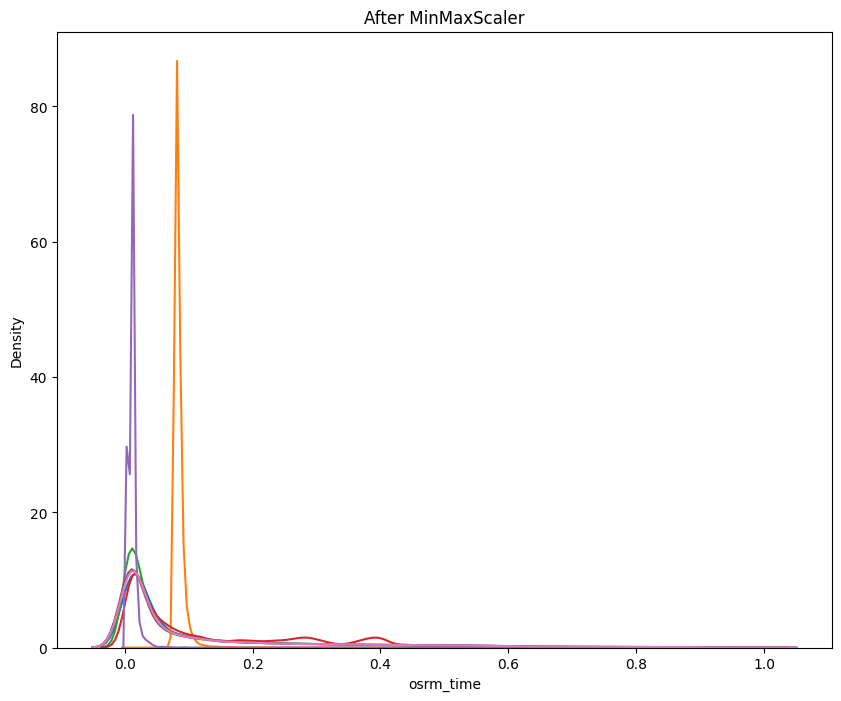

In [ ]:
fig, (ax1) = plt.subplots(ncols=1, figsize=(10,8))
ax1.set_title('After MinMaxScaler')
sns.kdeplot(MinMax_data['osrm_time'], ax=ax1)
sns.kdeplot(MinMax_data['segment_actual_time'], ax=ax1)
sns.kdeplot(MinMax_data['actual_time'], ax=ax1)
sns.kdeplot(MinMax_data['start_scan_to_end_scan'], ax=ax1)
sns.kdeplot(MinMax_data['segment_osrm_distance'], ax=ax1)
sns.kdeplot(MinMax_data['actual_distance_to_destination'], ax=ax1)
sns.kdeplot(MinMax_data['osrm_distance'], ax=ax1)

In [ ]:
def place2state(x):
    # transform "gurgaon_bilaspur_hb (haryana)" into "haryana"
    state = x.split('(')[1]
    return state[:-1] #removing ')' from the end

def place2city(x):
    #we will remove state
    city = x.split(' (')[0]
    city = city.split('_')[0]
    # Now dealing with edge cases

    if city == 'pnq vadgaon sheri dpc': return 'vadgaonsheri'
    # ['PNQ Pashan DPC', 'Bhopal MP Nagar', 'HBR Layout PC',
    #  'PNQ Rahatani DPC', 'Pune Balaji Nagar', 'Mumbai Antop Hill']
    if city in ['pnq pashan dpc','pnq rahatani dpc', 'pune balaji nagar']:
        return 'pune'
    if city == 'hbr layout pc' :
        return 'bengaluru'
    if city == 'bhopal mp nagar':
        return 'bhopal'
    if city == 'mumbai antop hill':
        return 'mumbai'
    return city

def place2city_place(x):

    # we will remove state
    x = x.split('(')[0]

    len_ = len(x.split('_'))

    if len_ >= 3:
        return x.split('_')[1]

    # small cities have same city and place name
    if len_ == 2:
        return x.split('_')[0]

    # now we need to deal with edge cases or imporper name convention

    # if len(x.split('_')) == 2:

    return x.split(' ')[0]

def place2code(x):
    # we will remove state
    x = x.split('(')[0]

    if len(x.split('_')) >= 3:
        return x.split('_')[-1]

    return 'none'

In [ ]:
trip_aggregated_data['destination_state'] = trip_aggregated_data['destination_name'].apply(lambda x: place2state(x))
trip_aggregated_data['destination_city']  = trip_aggregated_data['destination_name'].apply(lambda x: place2city(x))
trip_aggregated_data['destination_place'] = trip_aggregated_data['destination_name'].apply(lambda x: place2city_place(x))
trip_aggregated_data['destination_code']  = trip_aggregated_data['destination_name'].apply(lambda x: place2code(x))
trip_aggregated_data.head(2)

,trip_uuid,data,route_type,trip_creation_time,source_name,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,...,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,time_difference,distance_difference,destination_state,destination_city,destination_place,destination_code
0,trip-153671041653548748,training,FTL,2018-09-12 00:00:16.535741,Bhopal_Trnsport_H (Madhya Pradesh),Gurgaon_Bilaspur_HB (Haryana),2018-09-12 00:00:16.535741,2018-09-13 13:40:23.123744,999.0,383.759164,...,446.5496,1548.0,1008.0,1320.4733,8.108021e+05,14.061246,Haryana,Gurgaon,Bilaspur,HB
1,trip-153671042288605164,training,Carting,2018-09-12 00:00:22.886430,Tumkur_Veersagr_I (Karnataka),Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 00:00:22.886430,2018-09-12 03:01:59.598855,122.0,24.644021,...,28.1994,141.0,65.0,84.1894,1.025977e+07,12.607995,Karnataka,Chikblapur,ShntiSgr,D


In [ ]:
trip_aggregated_data['source_state'] = trip_aggregated_data['source_name'].apply(lambda x: place2state(x))
trip_aggregated_data['source_city']  = trip_aggregated_data['source_name'].apply(lambda x: place2city(x))
trip_aggregated_data['source_place'] = trip_aggregated_data['source_name'].apply(lambda x: place2city_place(x))
trip_aggregated_data['source_code']  = trip_aggregated_data['source_name'].apply(lambda x: place2code(x))
trip_aggregated_data.head(2)

,trip_uuid,data,route_type,trip_creation_time,source_name,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,...,time_difference,distance_difference,destination_state,destination_city,destination_place,destination_code,source_state,source_city,source_place,source_code
0,trip-153671041653548748,training,FTL,2018-09-12 00:00:16.535741,Bhopal_Trnsport_H (Madhya Pradesh),Gurgaon_Bilaspur_HB (Haryana),2018-09-12 00:00:16.535741,2018-09-13 13:40:23.123744,999.0,383.759164,...,8.108021e+05,14.061246,Haryana,Gurgaon,Bilaspur,HB,Madhya Pradesh,Bhopal,Trnsport,H
1,trip-153671042288605164,training,Carting,2018-09-12 00:00:22.886430,Tumkur_Veersagr_I (Karnataka),Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 00:00:22.886430,2018-09-12 03:01:59.598855,122.0,24.644021,...,1.025977e+07,12.607995,Karnataka,Chikblapur,ShntiSgr,D,Karnataka,Tumkur,Veersagr,I


In [ ]:
#Most Common Sources of Orders
source_order_counts = trip_aggregated_data['source_city'].value_counts()
most_common_sources = source_order_counts.head(10)  # Adjust the number as needed
print("Most Common Sources of Orders:\n")
most_common_sources


Most Common Sources of Orders:



Bengaluru     1015
Gurgaon       1013
Bhiwandi       811
Bangalore      755
Delhi          617
Mumbai         579
Hyderabad      562
Pune           445
Chandigarh     418
Kolkata        339
Name: source_city, dtype: int64

In [ ]:
#Busiest Corridors
corridor_counts = trip_aggregated_data.groupby(['source_city', 'source_place', 'source_state', 'destination_city', 'destination_place', 'destination_state']).size().reset_index(name='counts')
busiest_corridors = corridor_counts.sort_values('counts', ascending=False).head(10)

print("Busiest Corridors:\n")
busiest_corridors


Busiest Corridors:



,source_city,source_place,source_state,destination_city,destination_place,destination_state,counts
435,Chandigarh,Mehmdpur,Punjab,Chandigarh,Mehmdpur,Punjab,175
173,Bangalore,Nelmngla,Karnataka,Bengaluru,KGAirprt,Karnataka,151
1459,Muzaffrpur,Bbganj,Bihar,Muzaffrpur,Bbganj,Bihar,130
243,Bengaluru,Bomsndra,Karnataka,Bengaluru,KGAirprt,Karnataka,121
320,Bhiwandi,Mankoli,Maharashtra,Bhiwandi,Mankoli,Maharashtra,113
254,Bengaluru,KGAirprt,Karnataka,Bangalore,Nelmngla,Karnataka,108
7,Ahmedabad,East,Gujarat,Ahmedabad,East,Gujarat,107
340,Bhiwandi,Mankoli,Maharashtra,Mumbai Hub,Mumbai,Maharashtra,105
1382,Mumbai,Chndivli,Maharashtra,Bhiwandi,Mankoli,Maharashtra,99
171,Bangalore,Nelmngla,Karnataka,Bengaluru,Bomsndra,Karnataka,97


In [ ]:
# Group by source and destination to define each corridor
corridor_metrics = trip_aggregated_data.groupby(['source_city', 'source_place', 'source_state', 'destination_city', 'destination_place', 'destination_state']).agg({
    'actual_distance_to_destination': 'mean',
    'actual_time': 'mean'
}).reset_index()

# Rename columns for clarity
corridor_metrics.rename(columns={'actual_distance_to_destination': 'average_distance_km',
                                 'actual_time': 'average_time_minutes'}, inplace=True)

# Display the first few rows of the DataFrame
corridor_metrics.sort_values(by=['average_distance_km', 'average_time_minutes'], ascending=False).reset_index(drop=True)

,source_city,source_place,source_state,destination_city,destination_place,destination_state,average_distance_km,average_time_minutes
0,Gurgaon,Bilaspur,Haryana,MAA,Poonamallee,Tamil Nadu,1721.280753,3117.642857
1,Chandigarh,Mehmdpur,Punjab,Bangalore,Nelmngla,Karnataka,1701.850287,2906.850000
2,Gurgaon,Bilaspur,Haryana,Bangalore,Nelmngla,Karnataka,1689.690467,2910.000000
3,Bengaluru,Nelmngla,Karnataka,Gurgaon,Bilaspur,Haryana,1689.328666,2712.000000
4,Bhiwandi,Mankoli,Maharashtra,Kolkata,Dankuni,West Bengal,1628.807438,2929.555556
...,...,...,...,...,...,...,...,...
1971,Vadodara,Karelibaug,Gujarat,Vadodara,Karelibaug,Gujarat,9.069884,36.000000
1972,Delhi,Rohini,Delhi,North Delhi,North,Delhi,9.045083,27.000000
1973,Trivandrum,Pettah,Kerala,Trivandrum,Mnanthla,Kerala,9.043632,47.000000
1974,Bengaluru,South,Karnataka,Bengaluru,Sarjapur,Karnataka,9.042020,30.000000


# Insights & Recommendations: